In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train = train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
train.head()

,tracking_id,datetime,wind_speedms,atmospheric_temperatureC,shaft_temperatureC,blades_angle,gearbox_temperatureC,engine_temperatureC,motor_torqueNm,generator_temperatureC,...,windmill_body_temperatureC,wind_direction,resistanceohm,rotor_torqueNm,turbine_status,cloud_level,blade_lengthm,blade_breadthm,windmill_heightm,windmill_generated_powerkWh
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074


In [3]:
train.shape

(28200, 22)

In [4]:
train.isnull().sum()

tracking_id                       0
datetime                          0
wind_speedms                    273
atmospheric_temperatureC       3450
shaft_temperatureC                2
blades_angle                    216
gearbox_temperatureC              1
engine_temperatureC              12
motor_torqueNm                   24
generator_temperatureC           12
atmospheric_pressurePascal     2707
area_temperatureC                 0
windmill_body_temperatureC     2363
wind_direction                 5103
resistanceohm                     1
rotor_torqueNm                  572
turbine_status                 1759
cloud_level                     276
blade_lengthm                  5093
blade_breadthm                    0
windmill_heightm                543
windmill_generated_powerkWh     207
dtype: int64

In [5]:
train.duplicated().sum()

0

In [6]:
test = pd.read_csv('test.csv')
test = test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
test.head()

,tracking_id,datetime,wind_speedms,atmospheric_temperatureC,shaft_temperatureC,blades_angle,gearbox_temperatureC,engine_temperatureC,motor_torqueNm,generator_temperatureC,...,area_temperatureC,windmill_body_temperatureC,wind_direction,resistanceohm,rotor_torqueNm,turbine_status,cloud_level,blade_lengthm,blade_breadthm,windmill_heightm
0,WM_19817,2019-04-17 08:53:20,94.324266,17.641186,89.714193,51.146788,40.460560,39.594734,1073.202715,66.830037,...,24.004812,43.756693,445.976992,1664.222023,21.912243,BA,Medium,3.185837,0.403965,25.572431
1,WM_18723,2019-03-30 07:43:20,10.088870,13.978119,43.272846,46.516394,40.027788,41.176860,517.436430,37.284163,...,29.431813,42.728174,499.595287,1165.111992,-35.050093,A,Medium,3.016603,0.444755,24.371823
2,WM_34552,2019-08-10 11:33:20,347.152090,31.423035,41.076640,26.931602,43.109122,43.439556,1480.716492,70.010762,...,29.924235,43.256122,245.432231,1667.720491,27.195302,B2,Medium,2.611941,0.387368,27.654677
3,WM_28570,2019-06-26 03:53:20,24.471997,-99.000000,14.375078,66.513953,13.741253,15.577472,887.979475,41.445258,...,23.886434,13.501595,NaN,1329.744740,15.245757,BBB,Low,2.866805,0.450478,24.189426
4,WM_36934,2019-08-27 16:43:20,96.997026,33.281836,41.405192,1.843112,121.572907,43.934587,2053.916354,68.007787,...,35.906889,-99.000000,442.425744,691.408996,34.257024,A,Low,3.549672,0.368355,4.885440


In [7]:
test.shape

(12086, 21)

In [8]:
test.isnull().sum()

tracking_id                      0
datetime                         0
wind_speedms                   126
atmospheric_temperatureC      1427
shaft_temperatureC               1
blades_angle                   106
gearbox_temperatureC             1
engine_temperatureC              5
motor_torqueNm                  11
generator_temperatureC           5
atmospheric_pressurePascal    1151
area_temperatureC                1
windmill_body_temperatureC     926
wind_direction                2160
resistanceohm                    0
rotor_torqueNm                 281
turbine_status                 797
cloud_level                    125
blade_lengthm                 2114
blade_breadthm                   0
windmill_heightm               255
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
tracking_id                    28200 non-null object
datetime                       28200 non-null object
wind_speedms                   27927 non-null float64
atmospheric_temperatureC       24750 non-null float64
shaft_temperatureC             28198 non-null float64
blades_angle                   27984 non-null float64
gearbox_temperatureC           28199 non-null float64
engine_temperatureC            28188 non-null float64
motor_torqueNm                 28176 non-null float64
generator_temperatureC         28188 non-null float64
atmospheric_pressurePascal     25493 non-null float64
area_temperatureC              28200 non-null float64
windmill_body_temperatureC     25837 non-null float64
wind_direction                 23097 non-null float64
resistanceohm                  28199 non-null float64
rotor_torqueNm                 27628 non-null float64
turbine_status               

In [10]:
numeric_features = train.select_dtypes(float)
numeric_features1 = test.select_dtypes(float)

In [11]:
for i in numeric_features:
    train[i] = train[i].fillna(train[i].mean())

In [12]:
for i in numeric_features1:
    test[i] = test[i].fillna(test[i].mean())

In [13]:
train['turbine_status'].value_counts()

BB     1946
AAA    1939
BCB    1933
B2     1931
A      1930
D      1922
B      1882
AB     1868
ABC    1867
A2     1855
BA     1854
AC     1850
BD     1843
BBB    1821
Name: turbine_status, dtype: int64

In [14]:
train['cloud_level'].value_counts()

Low              13921
Medium           13704
Extremely Low      299
Name: cloud_level, dtype: int64

In [15]:
x = ['cloud_level', 'turbine_status']
for i in x:
    train[i] = train[i].fillna(train[i].value_counts().index[0])
    test[i] = test[i].fillna(test[i].value_counts().index[0])

In [16]:
train.isnull().sum()

tracking_id                    0
datetime                       0
wind_speedms                   0
atmospheric_temperatureC       0
shaft_temperatureC             0
blades_angle                   0
gearbox_temperatureC           0
engine_temperatureC            0
motor_torqueNm                 0
generator_temperatureC         0
atmospheric_pressurePascal     0
area_temperatureC              0
windmill_body_temperatureC     0
wind_direction                 0
resistanceohm                  0
rotor_torqueNm                 0
turbine_status                 0
cloud_level                    0
blade_lengthm                  0
blade_breadthm                 0
windmill_heightm               0
windmill_generated_powerkWh    0
dtype: int64

In [17]:
test.isnull().sum()

tracking_id                   0
datetime                      0
wind_speedms                  0
atmospheric_temperatureC      0
shaft_temperatureC            0
blades_angle                  0
gearbox_temperatureC          0
engine_temperatureC           0
motor_torqueNm                0
generator_temperatureC        0
atmospheric_pressurePascal    0
area_temperatureC             0
windmill_body_temperatureC    0
wind_direction                0
resistanceohm                 0
rotor_torqueNm                0
turbine_status                0
cloud_level                   0
blade_lengthm                 0
blade_breadthm                0
windmill_heightm              0
dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
x = ['cloud_level', 'turbine_status']
for i in x:
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])

In [20]:
newtrain = train
newtest = test

In [21]:
newtrain = newtrain.drop(['tracking_id', 'datetime'], axis = 1)
newtest = newtest.drop(['tracking_id', 'datetime'], axis = 1)

In [23]:
x = newtrain.drop('windmill_generated_powerkWh', axis = 1)
y = newtrain['windmill_generated_powerkWh']

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [25]:
from sklearn.metrics import mean_squared_error

In [38]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
y_pred = lgbm.fit(x_train, y_train).predict(x_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.5569624133158224


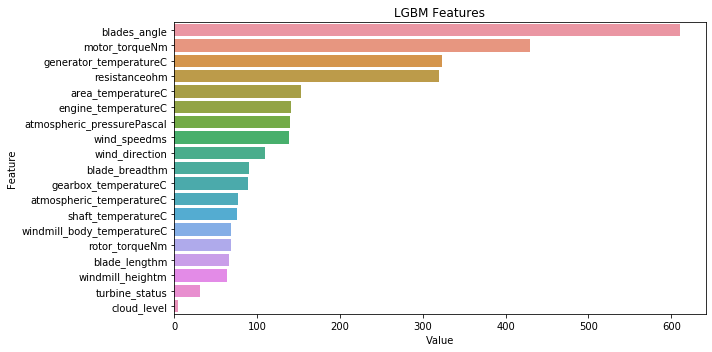

In [40]:
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(10,5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LGBM Features')
plt.tight_layout()
plt.show()

In [50]:
x_train = newtrain.drop(['windmill_generated_powerkWh', 'cloud_level', 'turbine_status'], axis = 1)
y_train = newtrain['windmill_generated_powerkWh']
x_test = newtest.drop(['cloud_level', 'turbine_status'], axis = 1)

In [47]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
y_pred = lgbm.fit(x_train, y_train).predict(x_test)
solution = pd.DataFrame({'tracking_id': test.tracking_id, 'datetime' : test.datetime, 'windmill_generated_power(kW/h)' : y_pred})
solution.to_csv('Solution.csv', index = False)